In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

from typing import Callable, Tuple, List

## 3.1
Используя таблицу значений $Y_i$ функции $y = f(x)$, вычисленных в точках $X_i, i=0,...,3$ построить интерполяционные многочлены Лагранжа и Ньютона, проходящие через точки $\{X_i, Y_i\}$. Вычислить значение погрешности интерполяции в точке $X^\ast$.

$y = arctg(x)$

а) $X_i = -3, -1, 1, 3$

б) $X_i = -3, 0, 1, 3$

$X^\ast = -0.5$

In [2]:
def Lagrange_interpolation_polynomial(f: Callable, x_coordinates: tuple) -> Callable:
    ''' Returns Lagrange polynomial function for a given function f calculated at points with x_coordinates '''
    
    def lagrange_poly(x):
        points = list(zip(x_coordinates, list(map(f, x_coordinates))))
        
        l = []
        for i in range(len(points)):
            l.append(np.prod([(x - points[j][0]) / (points[i][0] - points[j][0])
                              for j in range(len(points)) if i != j]))
        return sum([points[idx][1] * i for idx, i in enumerate(l)])
    
    return lagrange_poly


def Newton_interpolation_polynomial(f: Callable, x_coordinates: tuple) -> Callable:
    ''' Returns Newton polynomial function for a given function f calculated at points with x_coordinates '''

    def divided_diff(x, y):
        ''' Function to calculate the table of divided differences. '''
        n = len(y)
        coef = np.zeros([n, n])
        coef[:,0] = y
        
        for j in range(1,n):
            for i in range(n-j):
                coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
                
        return coef

    def newton_poly(x):
        ''' Evaluate the newton polynomial at x '''

        # take the first row of the divided difference table
        div_diff = divided_diff(x_coordinates, list(map(f, x_coordinates)))[0, :]
        
        n = len(x_coordinates) - 1
        p = div_diff[n]
        for k in range(1, n + 1):
            p = div_diff[n - k] + (x - x_coordinates[n - k]) * p
        return p
        
    return newton_poly


if __name__ == '__main__':
    
    f = math.atan
    x_coordinates_a = (-3, -1, 1, 3)
    x_coordinates_b = (-3, 0, 1, 3)
    x_star = -0.5
    
    Lagrange_polynomial_a = Lagrange_interpolation_polynomial(f, x_coordinates_a)
    Newton_polynomial_a = Newton_interpolation_polynomial(f, x_coordinates_a)
    print('a)')
    print(f'Lagrange polynomial at x = -0.5: {Lagrange_polynomial_a(x_star)}, absolute error: {abs(f(x_star) - Lagrange_polynomial_a(x_star))}')
    print(f'Newton polynomial at x = -0.5: {Newton_polynomial_a(x_star)}, absolute error: {abs(f(x_star) - Newton_polynomial_a(x_star))}')
    print(f'arctg(x) at x = -0.5: {f(x_star)}')

    Lagrange_polynomial_b = Lagrange_interpolation_polynomial(f, x_coordinates_b)
    Newton_polynomial_b = Newton_interpolation_polynomial(f, x_coordinates_b)
    print('\nb)')
    print(f'Lagrange polynomial at x = -0.5: {Lagrange_polynomial_b(x_star)}, absolute error: {abs(f(x_star) - Lagrange_polynomial_b(x_star))}')
    print(f'Newton polynomial at x = -0.5: {Newton_polynomial_b(x_star)}, absolute error: {abs(f(x_star) - Newton_polynomial_b(x_star))}')
    print(f'arctg(x) at x = -0.5: {f(x_star)}')

a)
Lagrange polynomial at x = -0.5: -0.4099982804142569, absolute error: 0.053649328586549194
Newton polynomial at x = -0.5: -0.4099982804142568, absolute error: 0.053649328586549305
arctg(x) at x = -0.5: -0.4636476090008061

b)
Lagrange polynomial at x = -0.5: -0.4099982804142568, absolute error: 0.053649328586549305
Newton polynomial at x = -0.5: -0.4099982804142568, absolute error: 0.053649328586549305
arctg(x) at x = -0.5: -0.4636476090008061


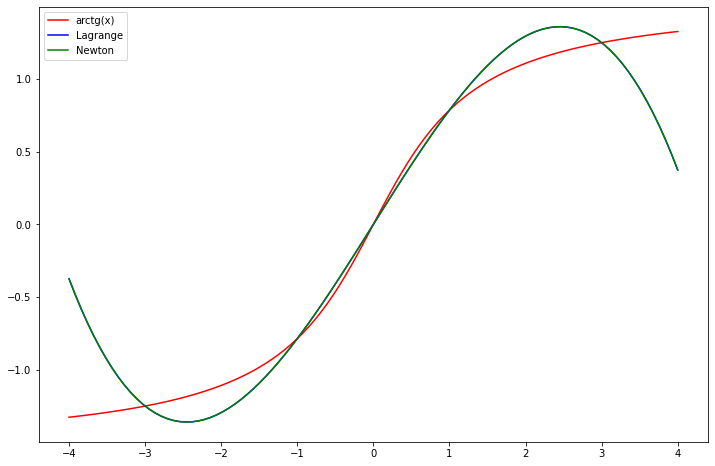

In [3]:
x = np.linspace(-4, 4, num=100)
plt.figure(figsize=(12, 8))
plt.plot(x, np.arctan(x), color='red', label='arctg(x)')
plt.plot(x, list(map(Lagrange_polynomial_a, x)), color='blue', label='Lagrange')
plt.plot(x, list(map(Newton_polynomial_a, x)), color='Green', label='Newton')
plt.legend()
plt.show()

## 3.2

Построить кубический сплайн для функции, заданной в узлах интерполяции,
предполагая, что сплайн имеет нулевую кривизну при $x = x_0$ и $x = x_4$. Вычислить
значение функции в точке $x = X^\ast$.

In [4]:
def tri_diagonal_matrix_algorithm(matrix: list, d: list, shape: int) -> list:
    ''' Solve the system of linear equations using the tri-diagonal matrix algorithm. '''
    a, b, c = zip(*matrix)
    p = [-c[0] / b[0]]
    q = [d[0] / b[0]]
    x = [0] * (shape + 1)
    for i in range(1, shape):
        p.append(-c[i] / (b[i] + a[i] * p[i - 1]))
        q.append((d[i] - a[i] * q[i - 1]) / (b[i] + a[i] * p[i - 1]))

    for i in reversed(range(shape)):
        x[i] = p[i] * x[i + 1] + q[i]

    return x[:-1]


def spline(x: list, f: list) -> List[list]:
    ''' Returns 4 lists of the cubic spline coefficients that interpolate the function f for given x coordinates '''
    n = len(x)
    h = [x[i] - x[i - 1] for i in range(1, n)]
    tridiag_matrix = [[0, 2 * (h[0] + h[1]), h[1]]]
    b = [3 * ((f[2] - f[1]) / h[1] - (f[1] - f[0]) / h[0])]
    for i in range(1, n - 3):
        tridiag_row = [h[i], 2 * (h[i] + h[i + 1]), h[i + 1]]
        tridiag_matrix.append(tridiag_row)
        b.append(3 * ((f[i + 2] - f[i + 1]) / h[i + 1] - (f[i + 1] - f[i]) / h[i]))

    tridiag_matrix.append([h[-2], 2 * (h[-2] + h[-1]), 0])
    b.append(3 * ((f[-1] - f[-2]) / h[-1] - (f[-2] - f[-3]) / h[-2]))

    c = tri_diagonal_matrix_algorithm(tridiag_matrix, b, n - 2)
    a = []
    b = []
    d = []
    c.insert(0, 0)
    for i in range(1, n):
        a.append(f[i - 1])
        if i < n - 1:
            d.append((c[i] - c[i - 1]) / (3 * h[i - 1]))
            b.append((f[i] - f[i - 1]) / h[i - 1] - h[i - 1] * (c[i] + 2 * c[i - 1]) / 3)

    b.append((f[-1] - f[-2]) / h[-1] - 2 * h[-1] * c[-1] / 3)
    d.append(-c[-1] / (3 * h[-1]))
    return a, b, c, d


def interpolate(x: list, x_0: float, coef: list) -> float:
    ''' Use the cubic spline to return the estimate of f(x_0). '''
    
    k = 0
    for i, j in zip(x, x[1:]):
        if i <= x_0 <= j:
            break
        k += 1
    
    a, b, c, d = coef
    diff = x_0 - x[k]
    return a[k] + b[k] * diff + c[k] * diff ** 2 + d[k] * diff ** 3


if __name__ == '__main__':
    x = [-3, -1, 1, 3, 5]
    f = [-1.249, -0.7854, 0.78540, 1.249, 1.3734]
    x_star = -0.5

    coef = spline(x, f)
    a, b, c, d = coef
    res = interpolate(x, x_star, coef)

    for i in range(len(x) - 1):
        print(f'[{x[i]}, {x[i + 1]}] : f_{i}(x) = {a[i]} + {b[i]}(x-({x[i]})) + {c[i]}(x-({x[i]}))^2 + {d[i]}(x-({x[i]}))^3\n')
    
    print('x* = ', x_star)
    print('f(x*) = ', res, end='\n\n\n')

[-3, -1] : f_0(x) = -1.249 + 0.0470000000000001(x-(-3)) + 0(x-(-3))^2 + 0.04619999999999999(x-(-3))^3

[-1, 1] : f_1(x) = -0.7854 + 0.6014(x-(-1)) + 0.27719999999999995(x-(-1))^2 + -0.09259999999999997(x-(-1))^3

[1, 3] : f_2(x) = 0.7854 + 0.599(x-(1)) + -0.2783999999999999(x-(1))^2 + 0.04739999999999998(x-(1))^3

[3, 5] : f_3(x) = 1.249 + 0.05420000000000001(x-(3)) + 0.005999999999999934(x-(3))^2 + -0.000999999999999989(x-(3))^3

x* =  -0.5
f(x*) =  -0.426975




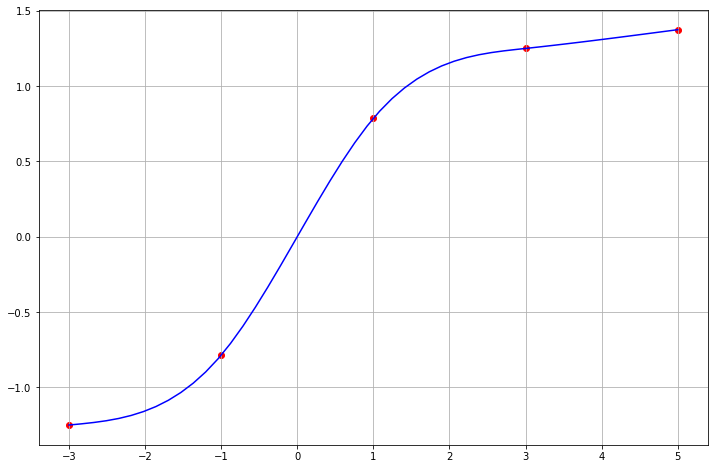

In [5]:
x_vals = np.linspace(x[0], x[-1])
y = [interpolate(x, val, coef) for val in x_vals]
plt.figure(figsize=(12, 8))
plt.plot(x_vals, y, color='b')
plt.scatter(x, f, color='r')
plt.grid()

## 3.3

3.3. Для таблично заданной функции путем решения нормальной системы МНК найти
приближающие многочлены a) 1-ой и б) 2-ой степени. Для каждого из приближающих
многочленов вычислить сумму квадратов ошибок. Построить графики приближаемой
функции и приближающих многочленов.

In [6]:
def least_squares(X: tuple, Y: tuple, degree: int) -> list:
    ''' 
    Returns coefficients for the polynomial a_0 + a_1*x + a_2*x^2 + ... + a_deg*x^deg 
    found using the least squares method. 
    '''

    n = degree + 1
    normal_equation_matrix = np.zeros((n, n))
    b = np.zeros(n)
    N = len(x) - 1
    for i in range(n):
        for j in range(n):
            normal_equation_matrix[i, j] = sum([x**(i + j) for x in X])
        b[i] = sum([y[k] * x[k] ** i for k in range(len(x))])
    
    least_squares_coeffs = np.linalg.solve(normal_equation_matrix, b)

    return least_squares_coeffs


def estimate_from_polynomial(a, point_x):
    return sum([a[i]*point_x**i for i in range(len(a))])


if __name__=="__main__":
    x = [-5, -3, -1, 1, 3, 5]
    y = [-1.3734, -1.249, -0.7854, 0.7854, 1.249, 1.3734]

    least_squares_polynomial_1 = least_squares(x, y, degree=1)
    print(f"y_1 = {least_squares_polynomial_1[0]} + {least_squares_polynomial_1[1]}x")
    y_vals_from_polynomial1 = [estimate_from_polynomial(least_squares_polynomial_1, x[i]) for i in range(len(x))]
    square_error_sum_1 = sum([(y_vals_from_polynomial1[i] - y[i])**2 for i in range(len(x))])
    print(f'Sum of squared errors: {square_error_sum_1}')

    least_squares_polynomial_2 = least_squares(x, y, degree=2)
    print(f"y_2 = {least_squares_polynomial_2[0]} + {least_squares_polynomial_2[1]}x + {least_squares_polynomial_2[2]}x^2")
    y_vals_from_polynomial2 = [estimate_from_polynomial(least_squares_polynomial_2, x[i]) for i in range(len(x))]
    square_error_sum_2 = sum([(y_vals_from_polynomial2[i] - y[i]) ** 2 for i in range(len(x))])
    print("Sum of squared errors", square_error_sum_2)

y_1 = 3.700743415417188e-17 + 0.32569714285714285x
Sum of squared errors: 0.7006594194285718
y_2 = 8.760353553682876e-17 + 0.32569714285714285x + -4.336808689942018e-18x^2
Sum of squared errors 0.7006594194285717


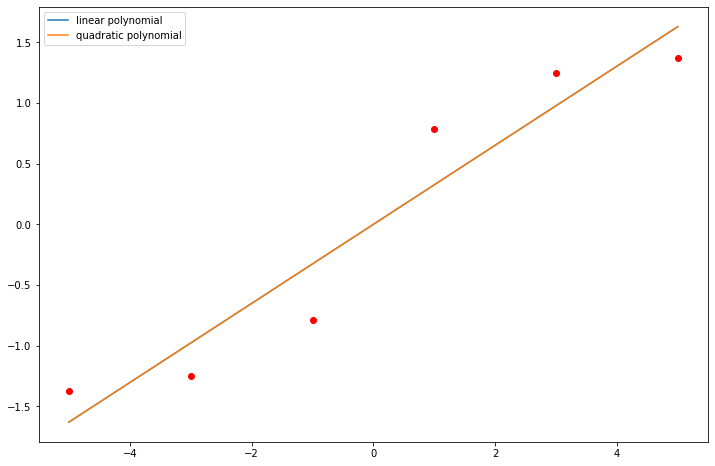

In [7]:
plt.figure(figsize=(12, 8))
line1, = plt.plot(x, y_vals_from_polynomial1, label="linear polynomial".format(least_squares_polynomial_1[0], least_squares_polynomial_1[1]))
line2, = plt.plot(x, y_vals_from_polynomial2, label="quadratic polynomial".format(least_squares_polynomial_2[0], least_squares_polynomial_2[1], least_squares_polynomial_2[2]))
plt.legend(handles=[line1, line2])
plt.scatter(x, y, color='red')

## 3.4

Вычислить первую и вторую производную от таблично заданной функции $y_i = f(x_i), i=0,...,4$ в точке $x = X^\ast$.

In [8]:
def get_first_derivative(x: list, y: list, seg_num: int) -> float:
    ''' Get the first derivative of a point-defined function in a particular segment. '''
    
    return (y[seg_num + 1] - y[seg_num])/(x[seg_num + 1] - x[seg_num])


def get_second_derivative(x: list, y: list, seg_num: int) -> float:
    ''' Get the second derivative of a point-defined function in a particular segment. '''

    return 2*(get_first_derivative(x, y, segment_num + 1) - get_first_derivative(x, y, segment_num))/\
           (x[seg_num+2] - x[seg_num])


if __name__ == "__main__":
    x = [0, 0.5, 1, 1.5, 2]
    y = [0, 0.97943, 1.8415, 2.4975, 2.9093]
    X = 1

    segment_num = -1
    i = 0
    while i + 1 < len(x) and x[i + 1] < X:
        i += 1

    segment_num = i
    print("Номер отрезка:", segment_num)

    if segment_num + 1 < len(x):
        if X == x[segment_num + 1]:
            if 0 < segment_num < len(x) - 2:
                left_derivative = get_first_derivative(x, y, segment_num)
                right_derivative = get_first_derivative(x, y, segment_num + 1)
                print(f'Левосторонняя производная: {left_derivative}')
                print(f'Правостороняя производная: {right_derivative}')
                derivative = (right_derivative + left_derivative) / 2
                print(f'Первая производная со вторым порядком точности: {derivative}')
                second_derivative = get_second_derivative(x, y, segment_num)
                print(f'Вторая производная: {second_derivative}')
            else:
                print('Краевая точка, производная не определена')
                exit()
        else:
            derivative = get_first_derivative(x, y, segment_num)
            print(f'Первая производная: {derivative}')
            if segment_num + 2 < len(x):
                second_derivative = get_second_derivative(x, y, segment_num)
                print(f'Вторая производная: {second_derivative}')

Номер отрезка: 1
Левосторонняя производная: 1.7241399999999998
Правостороняя производная: 1.3120000000000003
Первая производная со вторым порядком точности: 1.51807
Вторая производная: -0.824279999999999


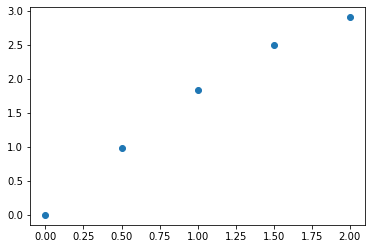

In [9]:
plt.scatter(x, y)

## 3.5

Вычислить определенный интеграл $F = \int_{x_0}^{x_k} y \,dx$ методами прямоугольников, трапеций, Симпсона с шагами $h_1, h_2$. Оценить погрешность вычислений, используя метод Рунге-Ромберга.

In [16]:
def rectangle_method(interval: list, f: Callable, h: float) -> float:
    ''' 
        Estimate the integral of the function f within given interval and step h
        using rectangle method.
    '''

    a, b = interval
    x = np.linspace(a, b, int((b - a) / h + 1))
    I = h * sum([f((i + j) / 2) for i, j in zip(x, x[1:])])
    return I


def trapezium_method(interval: list, f: Callable, h: float) -> float:
    ''' 
        Estimate the integral of the function f within given interval and step h
        using trapezium method.
    '''

    a, b = interval
    x = np.linspace(a, b, int((b - a) / h + 1))
    y = [f(i) for i in x]

    I = h / 2 * sum([f_i + f_j for f_i, f_j in zip(y[1:], y)])
    return I


def Simpson_method(interval: list, f: Callable, h: float) -> float:
    ''' 
        Estimate the integral of the function f within given interval and step h
        using Simpson's method.
    '''

    a, b = interval
    n = int((b - a) / h + 1)

    odd = 4 * np.sum([f(a + i * h) for i in range(1, n, 2)])
    even = 2 * np.sum([f(a + i * h) for i in range(2, n - 1, 2)])
    I = h / 3 * (f(a) + odd + even + f(b))
    return I


def Runge_Romberg(I_fh: float, I_fkh: float, k: float, p: float) -> float:
    '''
        Calculate the Runge-Romberg error of integration with method of order p.
        I_fh, I_fkh -- integrals calculated with step h1 and h2 respectively.
        k = h1 / h2.
    '''
    
    return I_fh + (I_fh - I_fkh) / (k**p - 1)


if __name__ == '__main__':
    interval = [0, 2]
    h = [0.5, 0.25]
    f = lambda x: x**2 / (x**2 + 16)

    methods = {
        'Rectangle method' : [rectangle_method, 1],
        'Trapezium method' : [trapezium_method, 2],
        'Simpson\'s method' : [Simpson_method, 4]
    }
    
    for method_name, method in methods.items():
        for i in range(len(h)):
            print(f'{method_name} with h = {h[i]}: {method[0](interval, f, h[i])}')
        print(f'Runge-Romberg error: {Runge_Romberg(method[0](interval, f, h[0]), method[0](interval, f, h[1]), h[0] / h[1], method[1])}', end='\n\n')


Rectangle method with h = 0.5: 0.14373851198488408
Rectangle method with h = 0.25: 0.14499262372828325
Runge-Romberg error: 0.1424844002414849

Trapezium method with h = 0.5: 0.1487479080146284
Trapezium method with h = 0.25: 0.14624320999975624
Runge-Romberg error: 0.14958280735291912

Simpson's method with h = 0.5: 0.1453893675489163
Simpson's method with h = 0.25: 0.1454083106614655
Runge-Romberg error: 0.14538810467474633



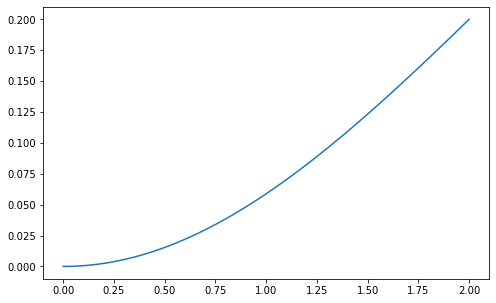

In [20]:
plt.figure(figsize=(8, 5))
x = np.linspace(*interval, 100)
plt.plot(x, list(map(f, x)))